<a href="https://colab.research.google.com/github/sonudk/Introduction_to_AI_and_IoT-/blob/master/BHAKTI_TIME_linearData_sine_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [0]:
import numpy as np

### Generate data

In [0]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    # YOUR CODE HERE
    
    y=np.sin(x)
    #print(y)
    return y

In [382]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [0]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,1)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    # YOUR CODE HERE
    x=np.random.random(N)
    #print(x)
    yd=np.sin(x)
    #print(yd)
    return x, yd

In [384]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

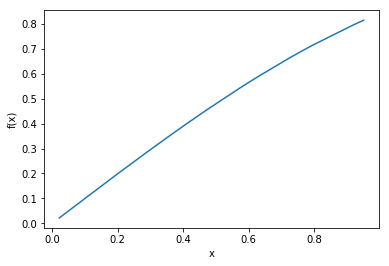

In [385]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
plotdata()

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [0]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    # YOUR CODE HERE
    B=np.zeros((len(x),D+1))
    #np.ndarray.astype(B,dtype=float)
    for i in range(D+1):
      #list=[]
      for j in range(len(x)):
        #list.append(x[j]**i)
        B[j][i]=(x[j]**i)
        
    #.append(list)  
    #print(B)
    return B

In [387]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

Test passed 👍


### Estimate Weights
Estimate w from yd and A. Use the least square solution you learnt in the video

In [0]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    # YOUR CODE HERE
    w=np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),yd)# dont forget linalg(it is short form for linear algebra)
    #print(w)
    #print(w.shape)
    return w

In [389]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

Test passed 👍


### Estimate y from the model, given x

In [0]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    # YOUR CODE HERE
    y=np.dot(createA(x, len(w)-1),w)
    return y

In [391]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

Test passed 👍


### Estimate Error
Find E as the mean squared error

In [0]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    # YOUR CODE HERE
    sum=0
    '''mean=np.sum(y)/len(y)
    print(mean)'''
    for i in range(len(y)):
      sum=sum+((yd[i]-y[i])*(yd[i]-y[i]))
    mse=sum/len(y)
    #till this point I didn't knew mse clearly it is not RMSE it is just mse >>>print(mse)
    return mse

In [393]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

Test passed 👍


### Plotting


In [0]:
def plotModel(x, y, yd):
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])
    plt.show()

# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

In [0]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    x=np.arange(0,2*np.pi,2*np.pi/N)
    '''print(x)
    print(x.shape)'''

    yd=np.zeros((N,1))
    for i in range(len(x)):
      yd[i]=fx(x[i])
    A=createA(x, D)  
    '''print(A)
    print(A.shape)
    print(yd)
    print(len(yd))'''
    w=train_w(A, yd)
    #print(w)
    y=np.dot(A,w)
    mse=compute_mse(y, yd)
    
    #print(yd)
    return x, y, yd, w, mse

[[ 0.69697257]
 [-0.08471177]
 [-0.03643864]]
MSE on train data =  [0.18892152]


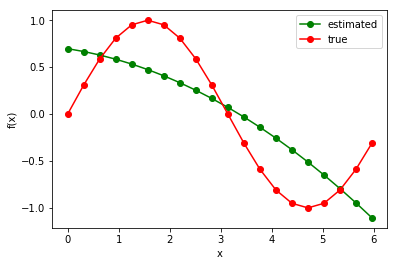

Test passed 👍


In [398]:
'''testing'''
def test_trainModel():
    N = 20
    D = 2
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==20
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_trainModel()

## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [0]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    x=np.arange(0,2*np.pi,2*np.pi/Ntest)
    yd=np.zeros((Ntest,1))
    for i in range(len(x)):
      yd[i]=fx(x[i])
    y=np.dot(createA(x,w.shape[0]-1),w)
    mse=compute_mse(y, yd)
    return x, y, yd, mse

[[ 2.86394844e-03]
 [ 9.96007294e-01]
 [ 2.36487625e-03]
 [-1.69476431e-01]
 [ 3.41604644e-03]
 [ 5.81791348e-03]
 [ 1.13242130e-03]
 [-5.14593134e-04]
 [ 5.23998917e-05]
 [-1.46558307e-06]
 [-2.36110233e-08]]
MSE on train data =  [8.00483159e-07]


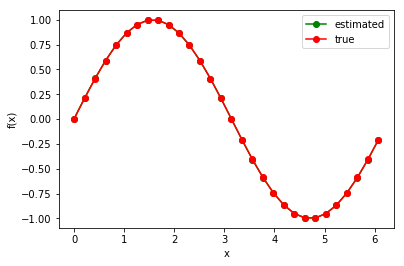

MSE on test data =  [7.42847557e-07]


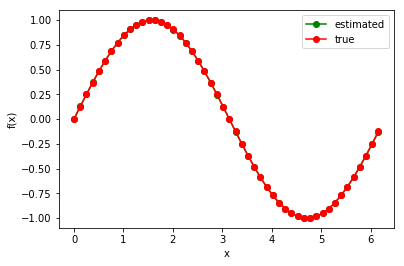

Test passed 👍


In [402]:
'''Testing'''
def test_testModel():
    N = 30
    D = 10
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==N
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)# why there is a bump
    Ntest = 50
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    plotModel(x,y,yd)# why this plot is so constant and it's error is much more than previous one 
    print('Test passed', '\U0001F44D')
test_testModel()

# ADVANCED

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

"plt.plot(test_error,N_list)  \nplt.xlabel('test_error')\nplt.ylabel('N_list')\nplt.title(' testing error vs N')"

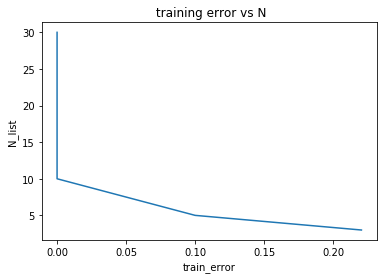

In [410]:
import matplotlib.pyplot as plt
N_list=[3,5,10,30]
D=5
train_error=[]
test_error=[]
for i in N_list:
  x, y, yd, w, mse=trainModel(i,D)
  x, y, yd, mse1=testModel(i,w)
  train_error.append(mse)
  test_error.append(mse1)
plt.plot(train_error,N_list)  
plt.xlabel('train_error')
plt.ylabel('N_list')
plt.title(' training error vs N')
# why both errors are same
'''plt.plot(test_error,N_list)  
plt.xlabel('test_error')
plt.ylabel('N_list')
plt.title(' testing error vs N')'''


Text(0.5, 1.0, ' testing error vs N')

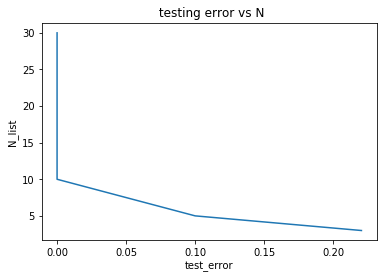

In [411]:
plt.plot(test_error,N_list)  
plt.xlabel('test_error')
plt.ylabel('N_list')
plt.title(' testing error vs N')

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

"plt.plot(test_error1,D_list)  \nplt.xlabel('test_error')\nplt.ylabel('N_list')\nplt.title(' training error vs N')"

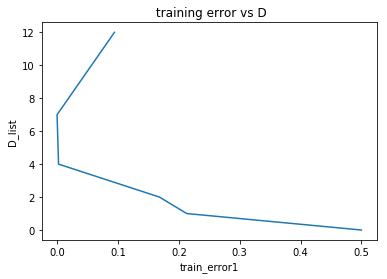

In [423]:
D_list=[0, 1, 2, 4, 7, 12]
N=10
train_error1=[]
test_error1=[]
for i in D_list:
  x1, y1, yd1, w1, mse2=trainModel(N,i)
  train_error1.append(mse2)
  x2, y2, yd2, mse3=testModel(N,w1)
  test_error1.append(mse3)
plt.plot(train_error1,D_list)  
plt.xlabel('train_error1')
plt.ylabel('D_list')
plt.title(' training error vs D')  
# why both are same plots
'''plt.plot(test_error1,D_list)  
plt.xlabel('test_error')
plt.ylabel('N_list')
plt.title(' training error vs N')'''    

Text(0.5, 1.0, ' testing error vs D')

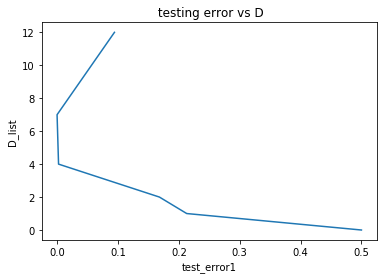

In [424]:
plt.plot(test_error1,D_list)  
plt.xlabel('test_error1')
plt.ylabel('D_list')
plt.title(' testing error vs D')

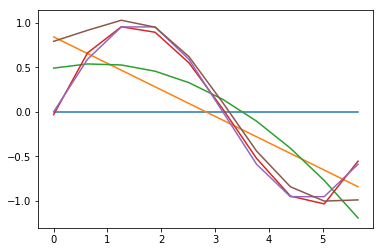

In [425]:
for i in D_list:
  x1, y1, yd1, w1, mse2=trainModel(N,i)
  plt.plot(x1,y1)
  plt.plot()
  